<a href="https://colab.research.google.com/github/DarkonorazulMaster/data-science-learning/blob/main/000_titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Analisis del dataset publico Titanic**



In [1]:
#Importar Librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Cargar datos dataset publico en este caso Titanic
titanic = sns.load_dataset("titanic")

In [3]:
#Explorar datos
print(titanic.head())
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [4]:
#Elimina filas con valores nulos en este ejemplo en "age" y "embarked"
titanic= titanic.dropna(subset = ["age", "embarked"])

In [5]:
#Convertir variables categoricas a numericas
titanic = pd.get_dummies(titanic, columns = ["sex", "embarked"],drop_first=True)

In [6]:
#Definir variables
X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']]
y = titanic['survived']

In [7]:
#Division en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
#Modelo de Machine Learning
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[101  21]
 [ 27  65]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       122
           1       0.76      0.71      0.73        92

    accuracy                           0.78       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.77      0.78      0.77       214



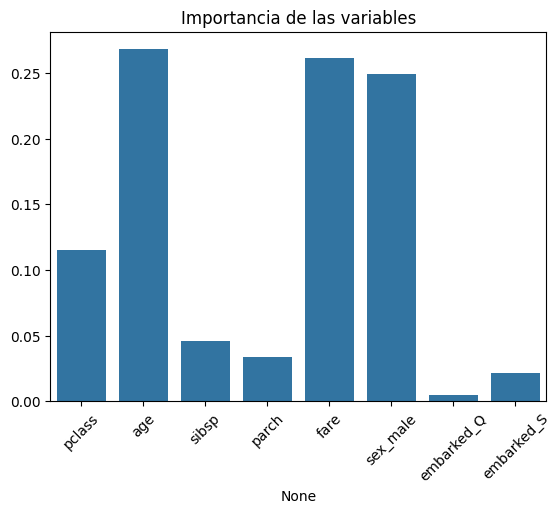

In [9]:
#Visualizacion
sns.barplot(x=X.columns, y=model.feature_importances_)
plt.xticks(rotation=45)
plt.title("Importancia de las variables")
plt.show()
